In [1]:
import netCDF4 as nc
from salishsea_tools import tidetools, nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

resultsDir='/data/eolson/MEOPAR/SS2D/'


In [2]:
grid=nc.Dataset(os.path.join(resultsDir,'bathy2DDeep.nc'))
print grid.variables

OrderedDict([(u'x', <netCDF4.Variable object at 0x7f8e76912808>), (u'y', <netCDF4.Variable object at 0x7f8e769128a0>), (u'Bathymetry', <netCDF4.Variable object at 0x7f8e76912938>)])


In [3]:

X=np.copy(grid.variables['x'])
Y=np.copy(grid.variables['y'])
B=grid.variables['Bathymetry']


In [4]:
new_bathy=nc.Dataset('/data/eolson/MEOPAR/SS2D/bathy2DconstLonLat.nc','w')
new_bathy.createDimension('y', B.shape[0])
new_bathy.createDimension('x', B.shape[1])
nc_tools.show_dimensions(new_bathy)

<type 'netCDF4.Dimension'>: name = 'y', size = 10

<type 'netCDF4.Dimension'>: name = 'x', size = 1100



In [5]:
new_x=new_bathy.createVariable('nav_lon',float,('y','x'), zlib=True)
new_x.setncattr('units','degrees east')
new_y = new_bathy.createVariable('nav_lat',float,('y','x'), zlib=True)
new_y.setncattr('units','degrees north')
newdepths = new_bathy.createVariable(
    'Bathymetry', float, ('y','x'),
    zlib = True, least_significant_digit=1)
newdepths.setncattr('units','metres')

In [6]:
new_x[:]=-123.69;
new_y[:]=48.82;
newdepths[:]=B

In [7]:
new_bathy.title="""Deep 2D Bathymetry Fake Lat Lon"""
new_bathy.institution="""
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia"""
new_bathy.comment= """
Based on bathy2DDeep.ncg"""
new_bathy.reference= """
eolson: alterBathyLonLat.ipynb"""

In [8]:
nc_tools.show_dataset_attrs(new_bathy)

file format: NETCDF4
title: Deep 2D Bathymetry Fake Lat Lon
institution: 
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
comment: 
Based on bathy2DDeep.ncg
reference: 
eolson: alterBathyLonLat.ipynb


In [9]:
new_bathy.close()

In [10]:
grid.close()

<matplotlib.colorbar.Colorbar instance at 0x7f8e76773950>

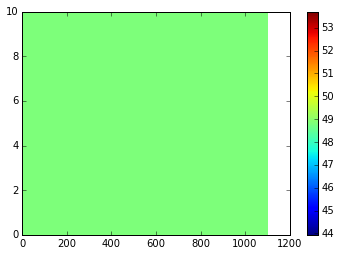

In [12]:
B=nc.Dataset('/data/eolson/MEOPAR/SS2D/bathy2DconstLonLat.nc')
lat=B.variables['nav_lat']
lon=B.variables['nav_lon']
plt.pcolormesh(lat[:]); plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f8e7604dd88>

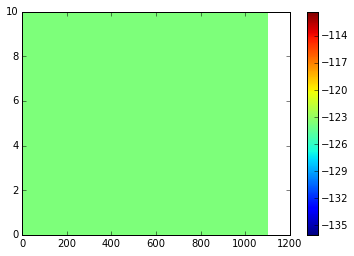

In [13]:
plt.pcolormesh(lon[:]); plt.colorbar()

In [14]:
B.close()